In [1]:
import pandas as pd
import numpy as np
import json
import pandas as pd
from cobra import Model, Reaction, Metabolite
from cobra.flux_analysis import flux_variability_analysis
import pickle
from tqdm import tqdm 
from ast import literal_eval
import cobra
import matplotlib.pyplot as plt
import numpy as np
from multiprocessing import Pool
from tqdm import tqdm
from functools import partial 
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import MaxNLocator, FormatStrFormatter
from matplotlib_venn import venn2_unweighted
import gurobipy
gurobipy.setParam('OutputFlag', 0)
import sys
sys.path.append('../retrosynthesis/')

from common import *

### input and output

In [2]:
###input
yeast870_path =  '../../Data/model/yeast-GEM.yml'
yeast8U_path = '../../Data/model/Yeast-MetaTwin.yml'
DeepEC_path = '../../Results/ECnumber_prediction/Sce_DeepECv2.txt'
rxndb_total_info_to_model_path = '../../Results/not_lipid/top50_0.3_re/rxndb_total_info_to_model_top50_0.3.csv'

###output
undergroundgene_coregene_venn_figure_path = '../../Results/Figures/fig3-f.pdf'

### gene in underground/core network

In [3]:
yeast8 = cobra.io.load_yaml_model(yeast870_path)
yeast8U = cobra.io.load_yaml_model(yeast8U_path)

yeast8_gene = set([x.id for x in yeast8.genes])
yeast8U_gene = set([x.id for x in yeast8U.genes])
yeast8U_reaction = [x.id for x in yeast8U.reactions]

In [4]:
rxndb_total_info_to_model = pd.read_csv(rxndb_total_info_to_model_path)

underground_gene = []
for index,row in rxndb_total_info_to_model.iterrows():
    if row['NO'] in yeast8U_reaction:
        # print(row['GPR'].replace('(','').replace(')','').replace(' or ',' ').split(' '))
        underground_gene += row['GPR'].replace('(','').replace(')','').replace(' or ',' ').split(' ')

underground_gene = list(set(underground_gene))
print(len(underground_gene))

1458


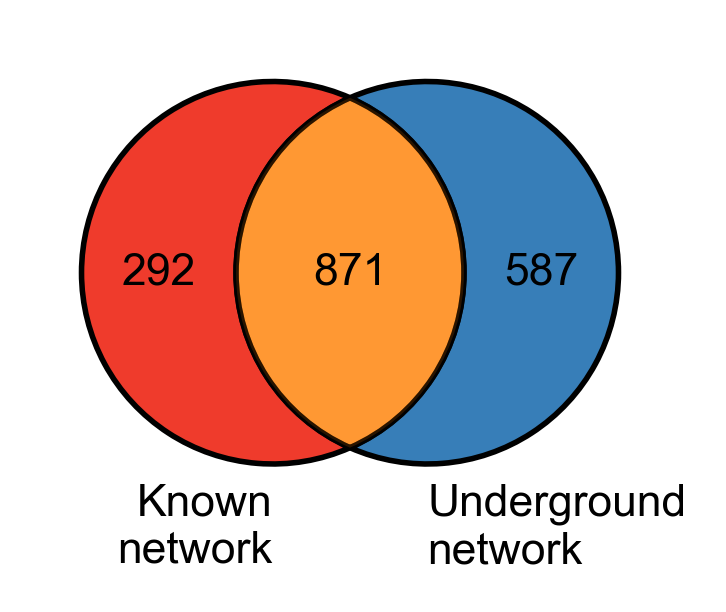

In [5]:
A = set(yeast8_gene)
B = set(underground_gene)
# Set general parameters
plt.figure(figsize=(2, 2.2), dpi=400)
plt.rcParams.update({'font.size': 8})
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['pdf.fonttype']= 42

# Draw Venn diagram
venn_labels = ['Known\nnetwork', 'Underground\nnetwork']

venn_diagram = venn2_unweighted([A, B], set_labels=venn_labels)
venn_diagram.get_patch_by_id('10').set_facecolor('#ef3b2c')
venn_diagram.get_patch_by_id('10').set_edgecolor('black')
venn_diagram.get_patch_by_id('10').set_alpha(1)
venn_diagram.get_patch_by_id('10').set_linewidth(1)

venn_diagram.get_patch_by_id('01').set_facecolor('#377eb8')
venn_diagram.get_patch_by_id('01').set_edgecolor('black')
venn_diagram.get_patch_by_id('01').set_alpha(1)
venn_diagram.get_patch_by_id('01').set_linewidth(1)

venn_diagram.get_patch_by_id('11').set_facecolor('#ff7f00')
venn_diagram.get_patch_by_id('11').set_edgecolor('black')
venn_diagram.get_patch_by_id('11').set_alpha(0.8)
venn_diagram.get_patch_by_id('11').set_linewidth(1)

# Modify the font size of the numbers in the Venn diagram
for text in venn_diagram.set_labels:
    text.set_fontsize(8)

for text in venn_diagram.subset_labels:
    text.set_fontsize(8)

# Save the figure
plt.savefig(undergroundgene_coregene_venn_figure_path, dpi=400, bbox_inches='tight')
plt.show()

In [1]:
292+871+587

1750